##Import necessary libraries

In [ ]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

#import datetime module from datetime
from datetime import datetime

import matplotlib.pyplot as plt
% matplotlib inline

## Load the dataset and Explore

In [ ]:
# load
url = "http://bit.ly/autolib_dataset"
df = pd.read_csv(url)
# preview
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [ ]:
# check for unique values
df.nunique(axis=0)

# for the column year and month, they are unique, i.e the dataset was for 2018 April

Address                1104
Cars                      8
Bluecar counter           8
Utilib counter            3
Utilib 1.4 counter        4
Charge Slots              3
Charging Status           3
City                     88
Displayed comment        25
ID                     1105
Kind                      4
Geo point              1105
Postal code             107
Public name            1105
Rental status             4
Scheduled at              8
Slots                     8
Station type              3
Status                    3
Subscription status       3
year                      1
month                     1
day                       9
hour                     24
minute                   60
dtype: int64

--only the **year** and **month** were unique, i.e, this data was collected in the month of April 2018

## Accessing Information about our Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

-- the dataset has 5000 rows and 25 columns


---- from the info, we can see that the **displayed comment** and **sheduled at** columns have missing values

## Cleaning the dataset



*  Validity
*  Completeness
*  Consistency
*  Uniformity





### Validity

Validity involves removing irrelevant columns

In [ ]:
# creating a function to drop the unnecessary columns
def drop_columns(df, column):
  #drop the column not required
  df.drop([column], axis = 1, inplace = True)
  return df


In [ ]:
# Procedure 1: Irrelevant Data Observation
# Data Cleaning Action: Dropping address and Geo point attribute  

# call the function to delete the columns
drop_columns(df, 'Geo point')
drop_columns(df, 'Address')

df.head()


,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


-- drop the **cars** column since its a duplicate of the bluecar as stated in the documentation

-- dropping the columns **Geo point** since We won't need them during Analysis

-- dropping **address** of the station, since the ID can be used to identify the stations

In [ ]:
# Procedure 2: date and time
# Data Cleaning Action: merge the column for year, month and day to be date
# Data Cleaning Action: merge the column for hour, minute to be time

df['date'] = df['year'].astype(str) + "/" + df['month'].astype(str) + "/" + df['day'].astype(str)

# then drop the individual columns year, month, day, and minute by calling the drop_column function
drop_columns(df, 'year')
drop_columns(df, 'month')
drop_columns(df, 'day')
drop_columns(df, 'minute')
df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,hour,date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,11,2018/4/8
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,7,2018/4/6
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,20,2018/4/3
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,4,2018/4/4
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,17,2018/4/8


### Consistency

Cosistency involves checking and handling duplicate values

In [ ]:
# Procedure 1: duplicate values
# Data Cleaning Action: no action taken
# Explanation:no duplicate values

df.duplicated().sum()

26

In [ ]:
df['Cars'] == df['Bluecar counter']

In [ ]:
# cars column is a duplicate of the bluecar counter
# action: drop the column by calling the drop column function
drop_columns(df, 'Cars')

### Completeness

Completeness involves checking and handling missing values

In [ ]:
# sum of null values per column
df.isnull().sum()

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
hour                      0
date                      0
dtype: int64

--**Displayed comment** column has 4889 missing values and **Scheduled at** column has 4953 missing values

In [ ]:
# drop the columns with null values, by calling the function drop_columns
drop_columns(df, 'Displayed comment')
drop_columns(df, 'Scheduled at')
df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,2018/4/8
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,2018/4/6
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,20,2018/4/3
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,4,2018/4/4
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,17,2018/4/8


### Uniformity

In [ ]:
# Procedure 1: standardization
# Data Cleaning Action: convert the date columns to datetime
#
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Address                        object
Bluecar counter                 int64
Utilib counter                  int64
Utilib 1.4 counter              int64
Charge Slots                    int64
Charging Status                object
City                           object
ID                             object
Kind                           object
Postal code                     int64
Public name                    object
Rental status                  object
Slots                           int64
Station type                   object
Status                         object
Subscription status            object
hour                            int64
date                   datetime64[ns]
dtype: object

In [ ]:
# Procedure 2: standardization
# Data Cleaning Action: rename the column names
#
df = df.rename(columns = {'Bluecar counter' : 'bluecar', 'Utilib counter' : 'utilib', 'Utilib 1.4 counter': 'utilib 1.4', 'Slots' : 'parking slots', 'Public name' : "station name"})
df.head()

,Address,bluecar,utilib,utilib 1.4,Charge Slots,Charging Status,City,ID,Kind,Postal code,station name,Rental status,parking slots,Station type,Status,Subscription status,hour,date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,2018-04-08
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,20,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,4,2018-04-04
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,17,2018-04-08


In [ ]:
# map all column names to lower case for uniformity
df.columns = map(str.lower, df.columns)
df.head(2)

,address,bluecar,utilib,utilib 1.4,charge slots,charging status,city,id,kind,postal code,station name,rental status,parking slots,station type,status,subscription status,hour,date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,2018-04-08
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,2018-04-06


### Finding outliers

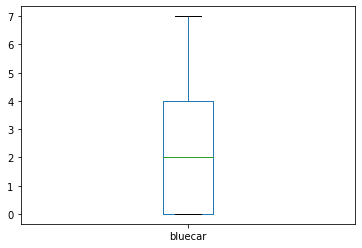

In [ ]:
## Visualising outliers using box plot.
# Creating a box plot of the variable 'bluecar'
# 
df.boxplot(column =['bluecar'], grid = False) 


no outliers for the attribute bluecar

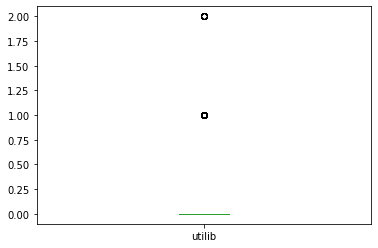

In [ ]:
# Creating a box plot of the variable 'utilib'
# 
df.boxplot(column =['utilib'], grid = False) 


-- the outlier is of small percentage and cannot affect the results by much

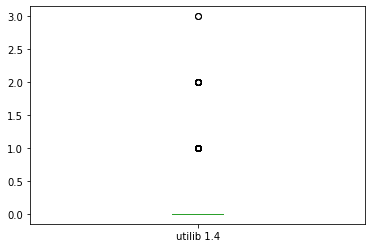

In [ ]:
# Creating a box plot of the variable 'utilib 1.4	'
# 
df.boxplot(column =['utilib 1.4'], grid = False) 


-- the outlier is of small percentage and cannot affect the results by much

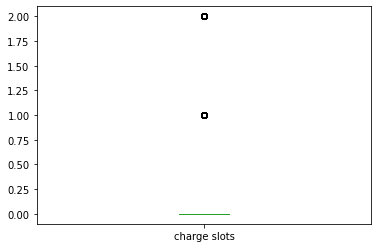

In [ ]:
# Creating a box plot of the variable 'charge slots'
# 
df.boxplot(column =['charge slots'], grid = False) 


-- the outlier is of small percentage and cannot affect the results by much

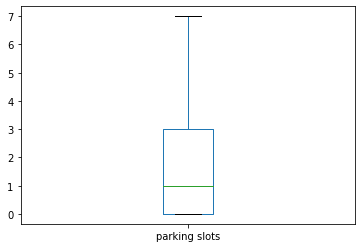

In [ ]:

# Creating a box plot of the variable 'parking slots'
# 
df.boxplot(column =['parking slots'], grid = False) 


-- no outliers for the parking slot column

In [ ]:
df.columns

Index(['address', 'bluecar', 'utilib', 'utilib 1.4', 'charge slots',
       'charging status', 'city', 'id', 'kind', 'postal code', 'station name',
       'rental status', 'parking slots', 'station type', 'status',
       'subscription status', 'hour', 'date'],
      dtype='object')

## Getting insights from the data (Analysis)

#### **1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.**

In [ ]:
paris = df[(df['city']== 'Paris') & (df['date'] >= '2018-04-01') & (df['date'] <= '2018-04-30') & (df['rental status']=='operational')]
data =pd.pivot_table(paris,values=['bluecar','utilib','utilib 1.4'],index=['hour'],aggfunc=np.sum)
data
sum_cars = data['bluecar'] + data['utilib 1.4'] + data['utilib']
data['total_cars'] = sum_cars
data.sort_values(by='total_cars',ascending=0).head(3)

,bluecar,utilib,utilib 1.4,total_cars
hour,,,,
21,268,8,20,296
6,260,13,15,288
9,250,5,19,274


#### **2.What is the most popular hour for returning cars?**

In [ ]:
popular_return_time = pd.pivot_table(df,values=['parking slots'],index=['hour'],aggfunc=np.sum)
popular_return_time.sort_values(by='parking slots',ascending=0).head(3)

,parking slots
hour,
14,441
2,440
21,438


#### **3.What station is the most popular? Overall?**

In [ ]:
# popular station is the station with the most resources
# resources for this case is the cars, charging slots and parking slots

df['total_resources'] = df['bluecar'] + df['utilib'] + df['utilib 1.4'] + df['charge slots'] + df['parking slots']
popular_station = pd.pivot_table(df, values = ['total_resources'], index = ['station name', 'id'], aggfunc=np.sum).sort_values(by = 'total_resources', ascending = 0)
popular_station.head(3)

,total_resources
station name,
Paris/Porte de Montrouge/8,83
Paris/Philippe Auguste/126,70
Paris/Voltaire/182,70


#### **4.What station is the most popular? At the most popular picking hour?**

In [ ]:

#the 21st hour was the most popular picking hour.
df2 = df[df['rental status']=='operational']
station_hour=df2[df2['hour']==21]
public=pd.pivot_table(station_hour,values=['bluecar','utilib','utilib 1.4', 'charge slots', 'parking slots'],index=['station name','station type', 'id'],aggfunc=np.sum)
tot=public['bluecar']+public['utilib 1.4']+public['utilib']+public['charge slots']+public['parking slots']
public['total']=tot
public.sort_values(by='total',ascending=0).head(3)


,,bluecar,charge slots,parking slots,utilib,utilib 1.4,total
station name,station type,,,,,,
Paris/Tronchet/19,station,0,6,18,0,0,24
Paris/Voltaire/182,station,1,6,15,0,0,22
Paris/Reille/59,station,8,2,4,0,0,14


--Paris/Tronchet/19 is the most popular station at the popular picking hour

#### **5.What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? Overall?**

In [ ]:
df.pivot_table(values = 'bluecar', index = ['postal code', 'station name'], aggfunc = np.sum).sort_values(by = 'bluecar', ascending = 0).head(3)

,,bluecar
postal code,station name,
92260,Fontenay-aux-Roses/Robert Marchand/32,50
92350,Le Plessis-Robinson/GalilÃ©e/16,49
92260,Fontenay-aux-Roses/Lombard/20,47


#### **6.What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? At the most popular picking hour?**

In [ ]:
# most popular hour, 21
df3 = df2[df2['hour']==21]

postal = pd.pivot_table(df3, values = 'bluecar', index = ['postal code', 'station name'], aggfunc = np.sum).sort_values(by = 'bluecar', ascending = 0)
postal.head(3)


,,bluecar
postal code,station name,
75014,Paris/Reille/59,8
93600,Aulnay-sous-bois/Isidore Nerat/6,7
75014,Paris/Boulard/1,7


#### **7.Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?** 

In [ ]:
#The postal code and station utilib and uilib 1.4
total = df['utilib'] + df['utilib 1.4']
df['total_utilibs']=total
df.pivot_table(values=['total_utilibs'],index=['postal code','station name'],aggfunc=np.sum).sort_values(by='total_utilibs',ascending =0).head(3)


,,total_utilibs
postal code,station name,
92310,SÃ¨vres/Grande Rue/123,12
75014,Paris/Porte de Montrouge/8,11
75017,Paris/Mac Mahon/5,8


In [ ]:

df.pivot_table(values=['bluecar'],index=['postal code','station name'],aggfunc=np.sum).sort_values(by='bluecar',ascending =0).head(3)


,,bluecar
postal code,station name,
92260,Fontenay-aux-Roses/Robert Marchand/32,50
92350,Le Plessis-Robinson/GalilÃ©e/16,49
92260,Fontenay-aux-Roses/Lombard/20,47


-- bluecar alone is still more popular than a combination of the two utilibs